## Import Libraries

In [184]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [186]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [190]:
# Check for missing values
df.isin(['?']).sum()
# Replace missing values
mode = df['stalk-root'].mode()[0]
df['stalk-root'] = df['stalk-root'].replace('?', mode)
df.isin(['?']).sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [192]:
X = df.drop('class', axis=1)
y = df['class']

In [194]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
categorical_columns = X.columns.tolist()
X[categorical_columns] = X[categorical_columns].astype('object')

# Now apply OneHotEncoder as before
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = ohe.fit_transform(X[categorical_columns])

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [198]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train_scaled, y_train)

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)


train_accuracies = []
test_accuracies = []

for k in range (1, 10):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    print(f"k = {k}")
    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%\n")


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:46:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


k = 1
Training Accuracy: 92.32%
Test Accuracy: 92.00%

k = 2
Training Accuracy: 92.54%
Test Accuracy: 92.31%

k = 3
Training Accuracy: 91.98%
Test Accuracy: 91.63%

k = 4
Training Accuracy: 92.31%
Test Accuracy: 92.00%

k = 5
Training Accuracy: 92.26%
Test Accuracy: 92.00%

k = 6
Training Accuracy: 92.32%
Test Accuracy: 92.12%

k = 7
Training Accuracy: 92.20%
Test Accuracy: 92.06%

k = 8
Training Accuracy: 92.60%
Test Accuracy: 92.12%

k = 9
Training Accuracy: 92.61%
Test Accuracy: 92.00%



In [199]:
y_pred_lr = lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", lr_accuracy)

y_pred_rf = rf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", rf_accuracy)

y_pred_knn = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", knn_accuracy)

y_pred_xgb = xgb.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", xgb_accuracy)

y_pred_mlp = mlp.predict(X_test_scaled)
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
print("Accuracy:", mlp_accuracy)

Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0


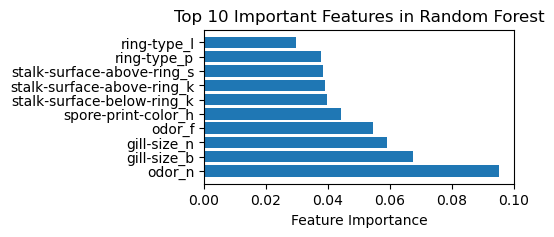

In [202]:
importances = rf.feature_importances_
feature_names = ohe.get_feature_names_out(categorical_columns)
top_indices = importances.argsort()[-10:][::-1]
plt.figure(figsize=(4, 2))
plt.barh(range(10), importances[top_indices], align='center')
plt.yticks(range(10), feature_names[top_indices])
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features in Random Forest')
plt.show()

In [204]:
df_reduced = df.drop(['odor', 'gill-size'], axis=1)
X_reduced = df_reduced.drop('class', axis=1)
y_reduced = df_reduced['class']

In [207]:
y_r_encoded = le.fit_transform(y_reduced)

categorical_columns = X_reduced.columns.tolist()
X_reduced[categorical_columns] = X_reduced[categorical_columns].astype('object')

X_r_encoded = ohe.fit_transform(X_reduced[categorical_columns])

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r_encoded, y_r_encoded, test_size=0.2, random_state=42)
X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)

In [209]:
lr.fit(X_train_r_scaled, y_train_r)

rf.fit(X_train_r_scaled, y_train_r)

knn.fit(X_train_r_scaled, y_train_r)

mlp.fit(X_train_r_scaled, y_train_r)

xgb.fit(X_train_r_scaled, y_train_r)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:46:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [210]:
y_pred_r_lr = lr.predict(X_test_r_scaled)
lr_r_accuracy = accuracy_score(y_test_r, y_pred_r_lr)
print("Accuracy:", lr_r_accuracy)

y_pred_r_rf = rf.predict(X_test_r_scaled)
rf_r_accuracy = accuracy_score(y_test_r, y_pred_r_rf)
print("Accuracy:", rf_r_accuracy)

y_pred_r_knn = knn.predict(X_test_r_scaled)
knn_r_accuracy = accuracy_score(y_test_r, y_pred_r_knn)
print("Accuracy:", knn_r_accuracy)

y_pred_r_xgb = xgb.predict(X_test_r_scaled)
xgb_r_accuracy = accuracy_score(y_test_r, y_pred_r_xgb)
print("Accuracy:", xgb_r_accuracy)

y_pred_r_mlp = mlp.predict(X_test_r_scaled)
mlp_r_accuracy = accuracy_score(y_test_r, y_pred_r_mlp)
print("Accuracy:", mlp_r_accuracy)

Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
